<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
titanic  =pd.read_csv('gdrive/MyDrive/ML/titanic.csv')
print(titanic.to_string())
%matplotlib inline

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Data-Cleaning
titanic.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


<Axes: >

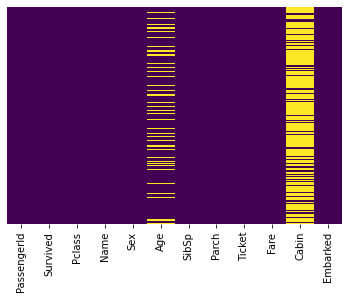

In [7]:
sns.heatmap(titanic.isnull(),cmap = 'viridis',annot=False,cbar=False,yticklabels=False)

<Axes: xlabel='Survived', ylabel='count'>

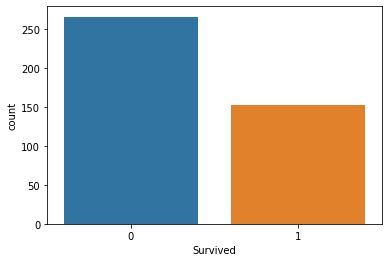

In [8]:
# sns.set_style('whitegrid')
sns.countplot(data=titanic , x='Survived')

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


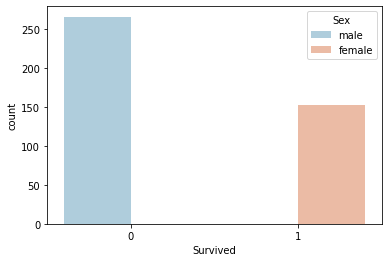

In [10]:
sns.countplot(data=titanic , hue="Sex" , x="Survived" , palette = 'RdBu_r')
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

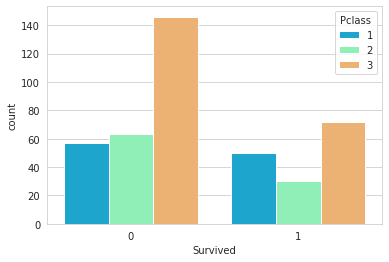

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived" , data = titanic  , hue="Pclass" ,palette = "rainbow")

<Axes: xlabel='Age', ylabel='Count'>

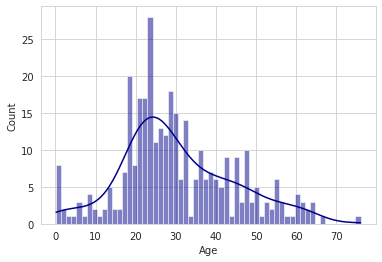

In [12]:
sns.histplot(titanic["Age"].dropna(), color="darkblue" ,  kde=True , bins=60 )

<Axes: >

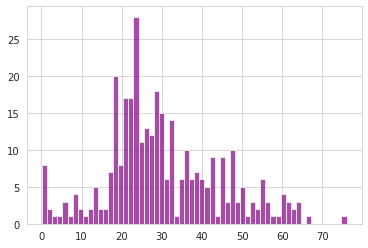

In [13]:
titanic["Age"].hist(color="purple" , bins=60 ,alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

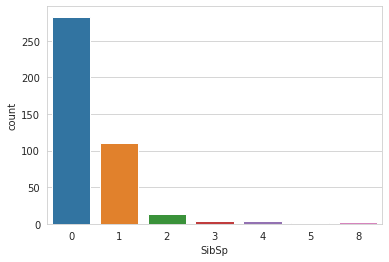

In [14]:
sns.countplot(x="SibSp" , data=titanic)


<Axes: >

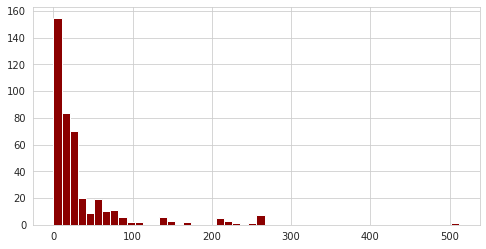

In [15]:
titanic["Fare"].hist(color="darkred" ,  bins=50 ,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

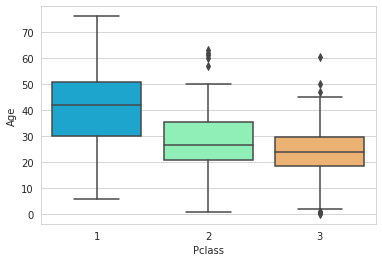

In [16]:
sns.boxplot(x="Pclass" , y="Age",data=titanic,palette="rainbow")

<Axes: xlabel='Fare'>

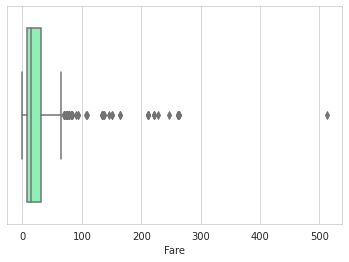

In [17]:
sns.boxplot(x="Fare",data=titanic,palette="rainbow")

In [18]:
def avgAge(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 41
    elif Pclass ==2:
      return 27
    elif Pclass == 3:
      return 25
  else:
    return Age


In [19]:
titanic['Age']  = titanic[['Age','Pclass']].apply(avgAge,axis=1)

<Axes: >

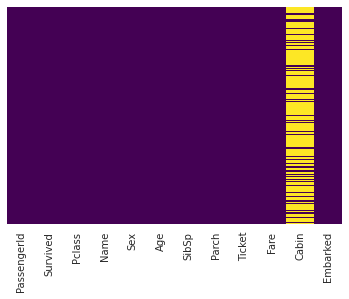

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [21]:
titanic.drop('Cabin',axis=1,inplace=True)


In [22]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [23]:
titanic["Fare"].fillna(10, inplace=True)

In [24]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [25]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [26]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [29]:
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [30]:
titanic['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic["Survived"], test_size=0.20,random_state = 42);

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:

predictions = logmodel.predict(X_test)

In [35]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']
X = np.array(X)
Y = np.array(Y)
print(X,Y)
Y = Y.reshape(-1,1)
print(X.shape)
print(Y.shape)

[[8.920e+02 3.000e+00 3.450e+01 ... 1.000e+00 1.000e+00 0.000e+00]
 [8.930e+02 3.000e+00 4.700e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [8.940e+02 2.000e+00 6.200e+01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.307e+03 3.000e+00 3.850e+01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.308e+03 3.000e+00 2.500e+01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.309e+03 3.000e+00 2.500e+01 ... 1.000e+00 0.000e+00 0.000e+00]] [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=42)

In [39]:
#Training and Predicting
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = reg.predict(X_train)

In [42]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 8.311464150104768e-16
MSE = 1.0912688421325769e-30
RMSE = 1.0446381393250856e-15
R_2 = 1.0


In [43]:
y_pred_test = reg.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print(f'MAE = {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'R_2 = {r2_score(y_test, y_pred_test)}')

MAE = 7.366241655449452e-16
MSE = 8.679035157639902e-31
RMSE = 9.316133939376303e-16
R_2 = 1.0
